## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Общая информация

Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from statistics import mean
import numpy as np
import warnings

In [2]:
games = pd.read_csv('/datasets/games.csv') 
games = pd.DataFrame(data=games)
games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Шаг 2. Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Приведение названия стобцов к нижнему регистру

In [5]:
games.columns = map(str.lower, games.columns)
games.head() # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

#### name & genre

In [6]:
from functools import partialmethod
import pandas as pd

pd.DataFrame.query = partialmethod(pd.DataFrame.query, engine="python")

In [7]:
games.query('name.isnull()') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
games[games['platform'] == "GEN"]['platform'].count() # Посчитаем пропуски

29

Игр на приставке GEN очень мало (29 из 16715), поэтому удалять их нет смысла. 

(GEN ~ Sega Genesis или известная во всем мире как Mega drive)

Причины пропуска имени и жанра вижу только в ошибке заполнения.

In [9]:
games['name'] = games['name'].fillna('no_name') #заменю на no_name
games['genre'] = games['genre'].fillna('no_genre') #заменю так же на no_genre

#### year_of_release

In [10]:
games.query('year_of_release.isnull()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6255,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,0.00,0.00,0.27,0.01,NaN,NaN,NaN
11119,Super Puzzle Fighter II,GBA,NaN,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E
10465,Disney's Chicken Little: Ace In Action,Wii,NaN,Shooter,0.09,0.00,0.00,0.01,72.0,tbd,E10+
12235,National Geographic Challenge!,X360,NaN,Misc,0.06,0.00,0.00,0.00,NaN,NaN,NaN
14141,Major League Baseball 2K8,PSP,NaN,Sports,0.03,0.00,0.00,0.00,63.0,tbd,E
9664,Charm Girls Club: My Fashion Mall,DS,NaN,Simulation,0.12,0.00,0.00,0.01,NaN,tbd,E
8319,James Cameron's Dark Angel,PS2,NaN,Action,0.08,0.07,0.00,0.02,48.0,6.5,T
6299,Flag Capture,2600,NaN,Action,0.25,0.02,0.00,0.00,NaN,NaN,NaN
5294,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,0.15,0.05,0.14,0.01,NaN,NaN,NaN
9293,Disney's Cinderella: Magical Dreams,GBA,NaN,Platform,0.10,0.04,0.00,0.00,69.0,tbd,E


In [11]:
len(games.query('year_of_release.isnull()'))*100/len(games) # Определим сколько пропущенно данных в %

1.6093329344899792

Удалим пропущенные значения из-за маленькой доли процента от всей выборки

In [12]:
games.dropna(subset=['year_of_release'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### critic_score

In [13]:
games.query('critic_score.isnull()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10509,Toaru Majutsu no Index,PSP,2011.0,Adventure,0.00,0.00,0.10,0.00,NaN,NaN,NaN
8457,Death Trap,2600,1982.0,Action,0.15,0.01,0.00,0.00,NaN,NaN,NaN
10674,Cabela's North American Adventures,PSP,2010.0,Sports,0.09,0.00,0.00,0.01,NaN,7.8,T
93,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,4.10,1.89,1.45,0.16,NaN,NaN,NaN
5100,Rec Room Games,Wii,2009.0,Sports,0.35,0.00,0.00,0.03,NaN,tbd,E
5163,Nonomura Byoin no Hitobito,SAT,1996.0,Adventure,0.00,0.00,0.36,0.00,NaN,NaN,NaN
2217,Crash City Mayhem,GBA,2004.0,Racing,0.67,0.25,0.00,0.02,NaN,NaN,NaN
16651,The Rise of the Argonauts,PC,2008.0,Role-Playing,0.00,0.01,0.00,0.00,NaN,NaN,NaN
6771,Jikkyou Powerful Pro Yakyuu 2001,PS,2001.0,Sports,0.00,0.00,0.23,0.02,NaN,NaN,NaN
115,Crash Bandicoot,PS,1996.0,Platform,3.23,2.35,0.94,0.30,NaN,NaN,NaN


In [14]:
len(games.query('critic_score.isnull()'))*100/len(games) # Определим сколько пропущенно данных в %

51.45932141554177

Большая часть игр так и не дошла до рецензии критиков, что не удивительно, до критиков доходят в основном лучшие представители или нашумевшие проекты, удалять такой объем данных нельзя да и заменить невозможно, заменяем на -1, потому что 0 вполне может быть "заслуженной" оценкой.

In [15]:
games['critic_score'] = games['critic_score'].fillna(-1)

#### user_score

In [16]:
games.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


In [17]:
len(games.query('user_score.isnull()'))*100/len(games) # Определим сколько пропущенно данных в %

40.1739024686854

Все зависит от страны составителя рейтинга, для 16712 Haitaka no Psychedelica продавалась только на внутреннем рынке Японии, поэтому могла бить незамеченная пользователями из других стран. По тем же причинам что и в рейтинге критиков заменяем на -1

In [18]:
games['user_score'] = games['user_score'].fillna(-1)

#### rating

In [19]:
games.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,NaN


In [20]:
len(games.query('rating.isnull()'))*100/len(games) # Определим сколько пропущенно данных в %

40.60561838744984

Рэтинг не проставлен для многих платформ, произойти это могло в следствии: ESRB был создан в 1994 и действует в США и Канаде, для игр созданных раньше или распространяемых в других странах мог не проставляться.  Определение рейтинга происходит с подачи издателя, если он не пришлет заявку на рейтинг, то и рейтинга у него не будет. Данных слишком много, чтобы их отбросить (более 40%). Подобрать значение невозможно. Заменим  на "no_rating".

In [21]:
games['rating'] = games['rating'].fillna("no_rating")

### Преобразуем данные в нужные типы

In [22]:
games['year_of_release'] = games['year_of_release'].astype('int') # Делаем год выхода целочисленным, без запятой

In [23]:
#games['user_score'] = games['user_score'].astype('float') # при выполнении данного когда получаем ошибку, так как 
# 'tbd' - в стмим "будет определно позже", тип "object", из-за этого и ошибка (закоментируем данный код)

Расшифровывается tbd = to be determined (будет определено позже), например в стиме обозначают игры рейтинг которых еще не подсчитан из за малого колличества оценок. Присвоим 'tbd' числовое значение по аналогии '-1' и приведем к столбец 'user_score' к 'float'

In [24]:
games.loc[games['user_score'] == 'tbd','user_score'] = float('nan')

In [25]:
# Перевод к числовому формату к числовому формату
games['user_score'] = games['user_score'].astype('float') 
games.info() # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       14070 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Определение суммарных продаж во всех регионах и запись их в отдельный столбец

In [26]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']
games.head() # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,30.38


In [27]:
games.duplicated().sum() # дополнительная проверка на дубликаты, все ок

0

## Шаг 3. Исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Количество игр по годам

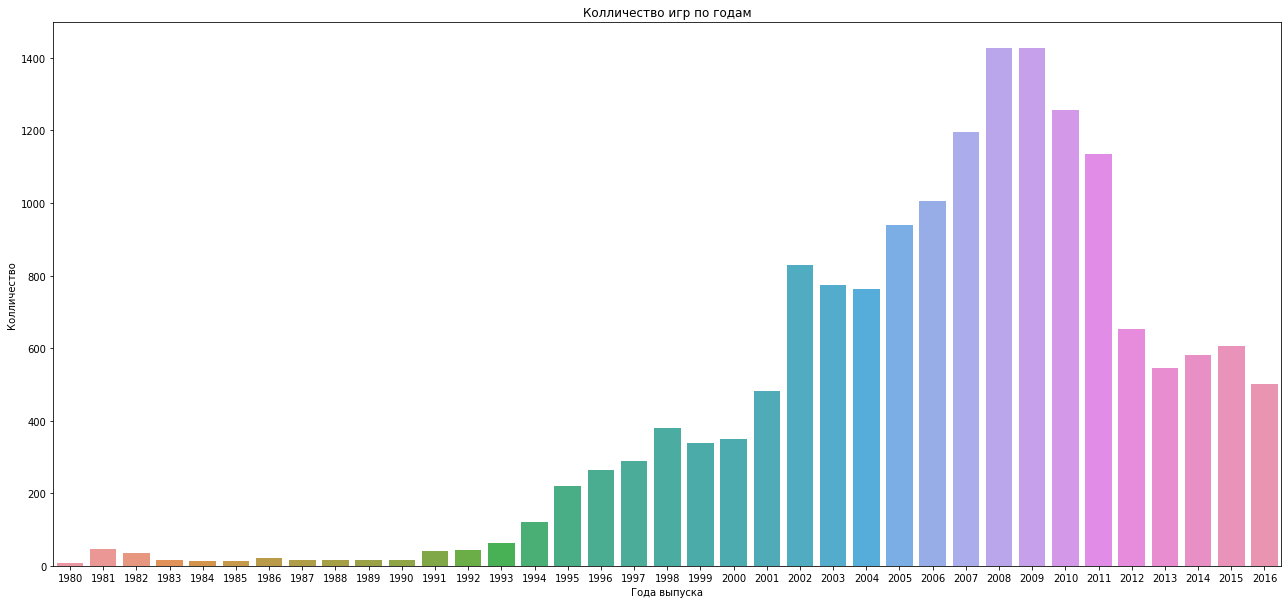

In [28]:
allyear = games.pivot_table(index='year_of_release', values='name', aggfunc='count') # распределение колличество игр по годам
plt.figure(figsize=(22,10))
sns.barplot(x=allyear.index, y="name", data=allyear)
plt.title('Колличество игр по годам')
plt.xlabel('Года выпуска')
plt.ylabel('Колличество')
plt.show()

Данные до 1994 года достаточно малочисленные из-за этого не представляют большого интереса для анализа. Спад после 2009 совпадает с выходом мобильных теелфонов на базе android и iOS, с этого момента геймеры начинают использовать телефон как игровые консоли.

### Продажи по платформам

#### Выбор платформ с наибольшими суммарными продажами и построение распределения по годам

In [29]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,14070.000000,16446.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,32.975739,3.310362,0.488513
std,5.877050,0.818416,0.506696,0.311082,0.187994,36.302673,4.200221,1.423434
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,4.300000,0.160000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.600000,0.430000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,74.090000


При анализе данных была найдена ошибка, платформа DS(Nintendo DS) не могла продаваться в 1985г., так как произведена в 2004 году

In [30]:
sales_platform = games[games['year_of_release'] != -1].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sales_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.73,NaN,NaN,NaN,NaN,1.40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
games[(games['platform']=='DS')&(games['year_of_release']==1985)] # найден кто это

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,no_rating,0.02


Это переиздание японских шахмат "Shogi" с платформы NES на DS 2005года, исправим это

In [32]:
games.loc[15957, 'year_of_release'] = 2005
sales_platform = games[games['year_of_release'] != -1].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

Определим лучшие 7 платформ по продажам.

In [33]:
top7 = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(7, 'total_sales')
top7 = list(top7.index)
top7

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA']

In [34]:
platform_sales_pivot_table = pd.pivot_table(games, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('total_sales',ascending=False)
platform_sales_pivot_table

,total_sales
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89
GBA,305.27
PS4,265.79
PSP,248.77


Построим график продаж для top-7 игровых платформ

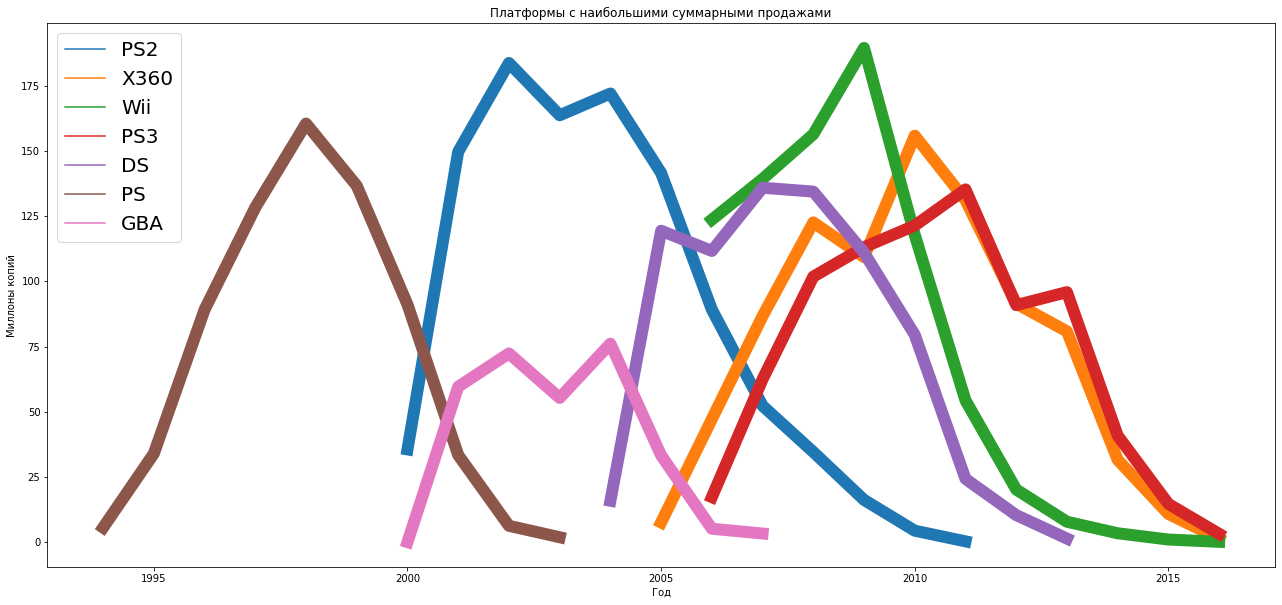

In [35]:
sales_platform7 = sales_platform.loc[:, ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA']]
plt.figure(figsize=(22,10))
sns.lineplot(data = sales_platform7, linewidth = 12, dashes=False)
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Миллоны копий')
plt.legend(loc='upper left', fontsize=20, bbox_to_anchor=(0, 1))
plt.show()

В каждый период времени были свои популярные платформы. Нопопулярность постоянно переходила от одной к другой платформе. Постоянного лидера на всем рассматривааемом периоде не было.

#### Время жизни платформы

In [36]:
alllife=[]
for platform in sales_platform.columns:
    lst=(sales_platform.index[~sales_platform[platform].isnull()])
    life =lst.max()-lst.min()+1
    alllife.append(life)
mean(alllife)

8

Срок жизни игровой платформы составляет 8 лет. Исходя из этого для прогнозирования можно оставить промежуток времени -  последние 8 лет.

### Данные за соответствующий актуальный период 

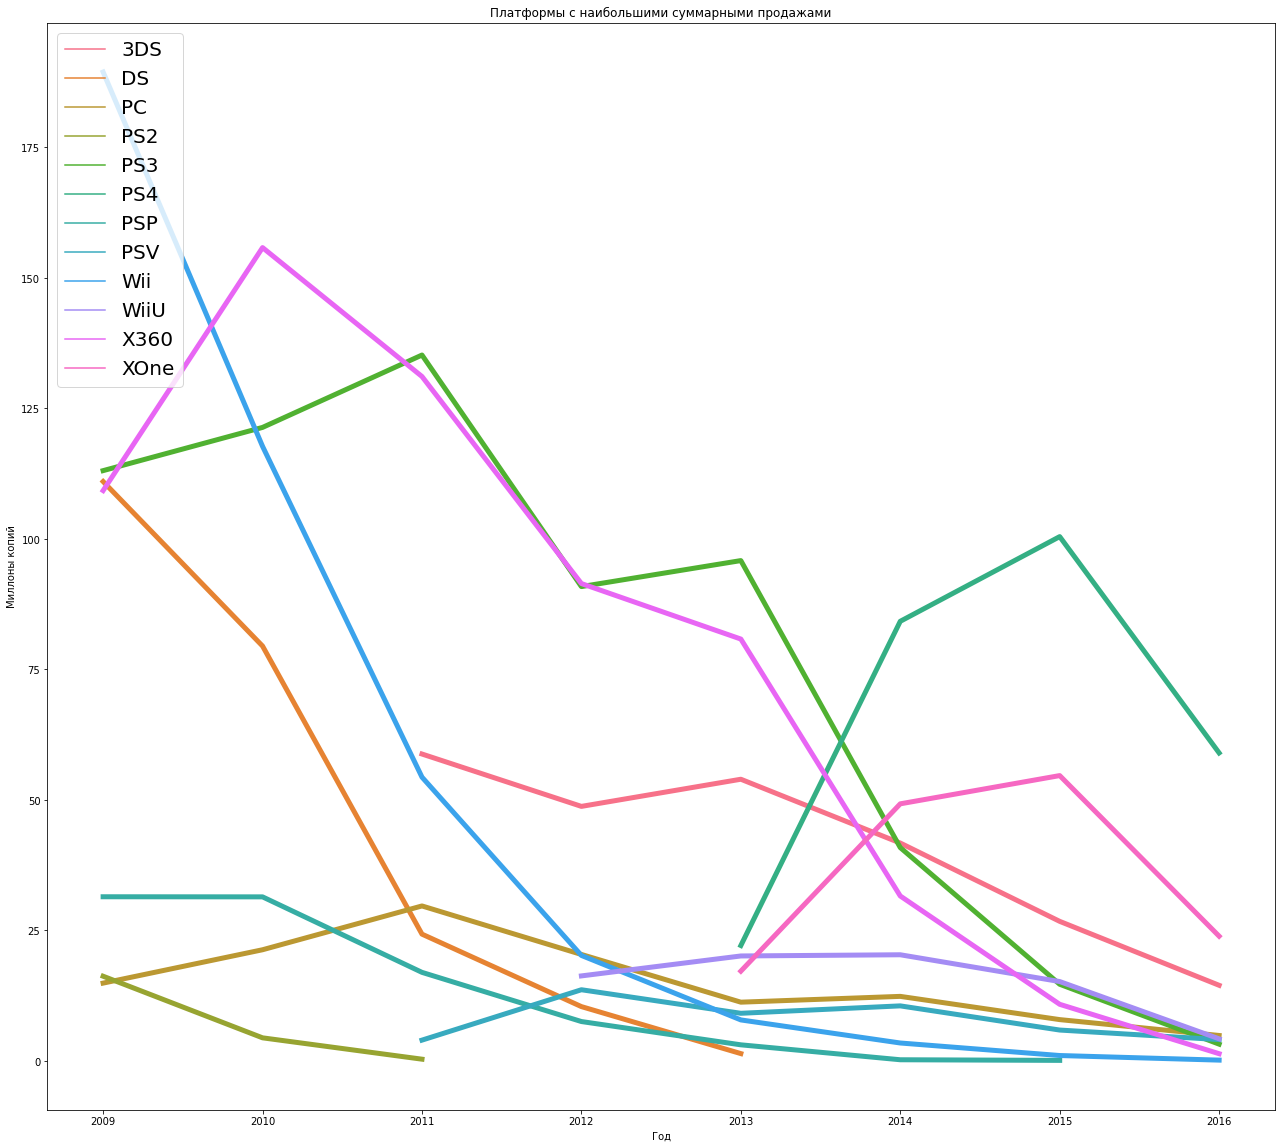

In [37]:
relevantgames = games[games['year_of_release'] > 2008]
relevantplatform = relevantgames.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plt.figure(figsize=(22,20))
sns.lineplot(data = relevantplatform, linewidth = 5, dashes=False)
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Миллоны копий')
plt.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1))
plt.show()

Оставим только популярные платформы для получения большей информативности

###  Выбор несколько потенциально прибыльных платформ

In [38]:
# Добавили еще PC. Так как компьютерные игры все таки существует по иным правилам чем консоли.
relevantgames8 = relevantgames.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(8, 'total_sales')
relevanttop8 = list(relevantgames8.index)
relevanttop8

['PS3', 'X360', 'Wii', 'PS4', '3DS', 'DS', 'XOne', 'PC']

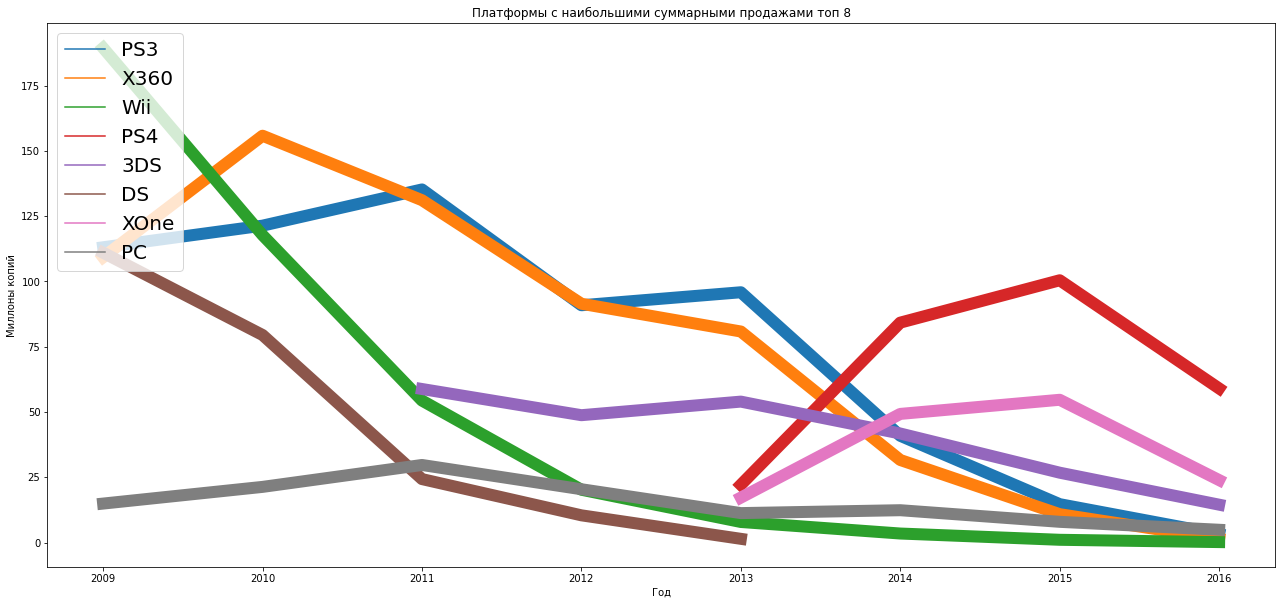

In [39]:
relevantplatform8 = relevantplatform.loc[:, ['PS3', 'X360', 'Wii', 'PS4', '3DS', 'DS', 'XOne', 'PC']]
plt.figure(figsize=(22,10))
sns.lineplot(data = relevantplatform8, linewidth = 12, dashes=False)
plt.title('Платформы с наибольшими суммарными продажами топ 8')
plt.xlabel('Год')
plt.ylabel('Миллоны копий')
plt.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1))
plt.show()

Анализируя график можно сказать, что основные платформы по продажам в последнее время являются самые современные платформы, а именно Xone и PS4. Было принято решение, что для более точного дальнейшего анализа 2017 года, необходимо ориентироваться на эти платформы. Поэтому ограничу данные годом начала продаж этих платформ, а именно 2013 год.

In [40]:
relevantgames = relevantgames[relevantgames['year_of_release'] > 2012]

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

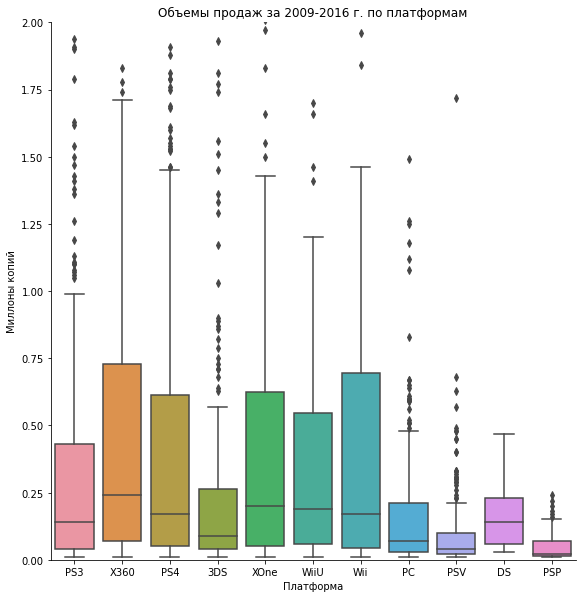

In [41]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=relevantgames, 
            orient='v',
            height=8)
plt.title('Объемы продаж за 2009-2016 г. по платформам')
plt.xlabel('Платформа')
plt.ylabel('Миллоны копий')
plt.ylim(0, 2)

В общей массе продажи не достигают и миллиона копий, но где-то в районе выбросов или даже за гранью графиков есть популярные игры - проекты с миллионами продаж.

### Диаграмма рассеяния и расчет корреляции между отзывами и продажами

Возьмем 2 самые популярные и актуальные платформы  PS4 и  XOne

In [42]:
ps4 = relevantgames.query('platform == "PS4"')
xone = relevantgames.query('platform == "XOne"')

#### Диаграмма рассеяния и корреляция оценок пользователей и продаж PS4 И Xbox One

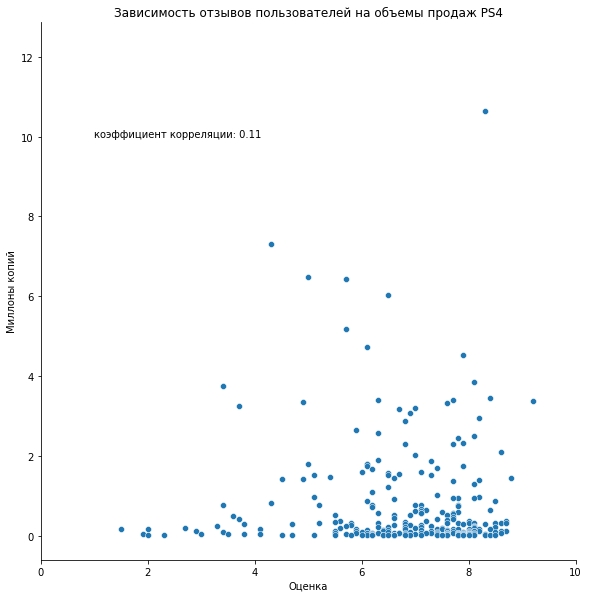

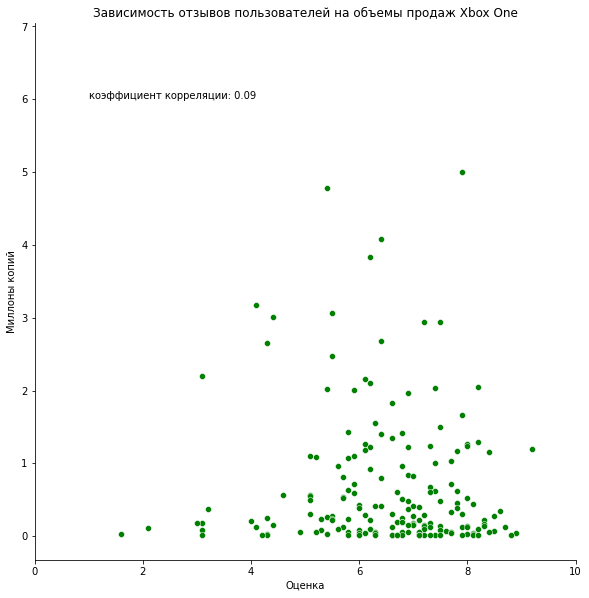

In [43]:
sns.relplot(data=ps4, 
            x='user_score', 
            y='total_sales',
            height=8)
plt.title('Зависимость отзывов пользователей на объемы продаж PS4')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 10)
plt.text(1, 10, 'коэффициент корреляции: ' + str(round(ps4['user_score'].corr(ps4['total_sales']), 2)))
plt.show()

sns.relplot(data=xone, 
            x='user_score', 
            y='total_sales',
            height=8,
            color='green')
plt.title('Зависимость отзывов пользователей на объемы продаж Xbox One')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 10)
plt.text(1, 6, 'коэффициент корреляции: ' + str(round(xone['user_score'].corr(xone['total_sales']), 2)))
plt.show()

#### Диаграмма рассеяния и корреляция оценок критиков и продаж PS4 И Xbox One

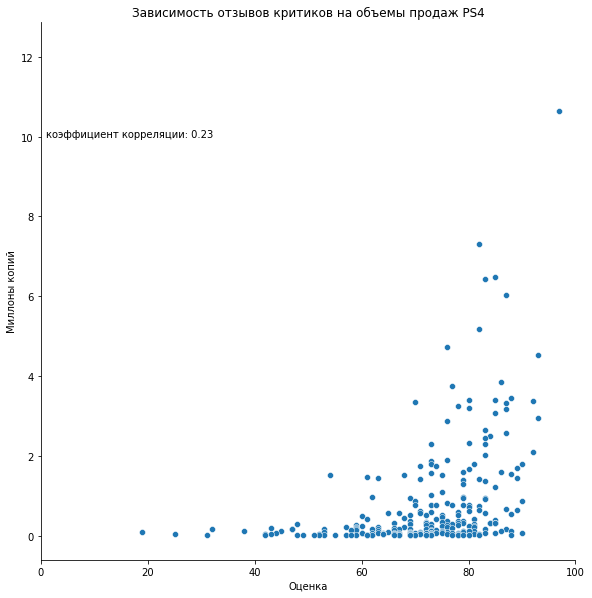

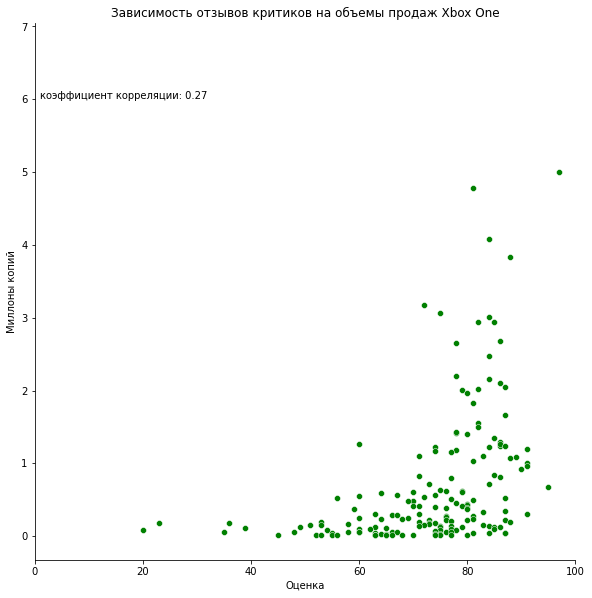

In [44]:
sns.relplot(data=ps4, 
            x='critic_score', 
            y='total_sales',
            height=8)
plt.title('Зависимость отзывов критиков на объемы продаж PS4')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 100)
plt.text(1, 10, 'коэффициент корреляции: ' + str(round(ps4['critic_score'].corr(ps4['total_sales']), 2)))
plt.show()
sns.relplot(data=xone, 
            x='critic_score', 
            y='total_sales',
            height=8,
            color='green')
plt.title('Зависимость отзывов критиков на объемы продаж Xbox One')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 100)
plt.text(1, 6, 'коэффициент корреляции: ' + str(round(xone['critic_score'].corr(xone['total_sales']), 2)))
plt.show()

Анализируя графики можно сказать, что взаимосвязи между оценками пользователей и продажами нет.
Есть небольшая взаимосвязь между оценками критиков и продажами. 

Графики показывают, что игры с большими продажами имели высокие оценки критиков, но не все игры с высокой оценкой критиков имели высокие продажи. Можно предположить, что цифры продаж в большой степени зависят от рекламы продукта. Часто бывает, что пользователи разочаровываются получившимся продуктом. А вот критикам всегда все нравится (в последнее время было много скандалов по этому поводу)

### Соотнесение выводов с продажами игр на других платформах

In [45]:
relevanttop8

['PS3', 'X360', 'Wii', 'PS4', '3DS', 'DS', 'XOne', 'PC']

In [46]:
print('Коэффициент корреляции')
print()
print('{: <30}|{: <30}'.format('продажи и оценки критиков', 'продажи и оценки пользователей'))
print('_____________________________________________________________')
print()
for name_platform in relevanttop8:
    print(name_platform)
    print()
    print('{: <30.2}{: <30.2}'.format(relevantgames[relevantgames['platform']==name_platform]['total_sales']\
                                   .corr(relevantgames[relevantgames['platform']==name_platform]['critic_score'])\
                                   
                                   , relevantgames[relevantgames['platform']==name_platform]['total_sales']\
                                   .corr(relevantgames[relevantgames['platform']==name_platform]['user_score'])))
    print('_____________________________________________________________')
    print()

Коэффициент корреляции

продажи и оценки критиков     |продажи и оценки пользователей
_____________________________________________________________

PS3

0.28                          0.19                          
_____________________________________________________________

X360

0.25                          0.042                         
_____________________________________________________________

Wii

nan                           0.8                           
_____________________________________________________________

PS4

0.23                          0.11                          
_____________________________________________________________

3DS

0.059                         0.027                         
_____________________________________________________________

DS

nan                           0.23                          
_____________________________________________________________

XOne

0.27                          0.085                         
__________

Анализируя данные можно сказать, что  по всем платформам сохраняется отсутствие связи оценок пользователей к объемам продаж (корреляция близка к "0") и небольшая взаимосвязь оценок критиков к объемам продаж. 

Наибольшая корреляция оценок критиков к объемам продажам современных консолей, внимание к консолям предыдущего поколения снижено. 

### Общее распределение игр по жанрам

In [47]:
genre = relevantgames.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
genre.columns = ['sum', 'count']
genre.sort_values(by='sum', ascending=False)

,sum,count
genre,,
Action,284.67,766
Shooter,204.21,187
Role-Playing,134.41,292
Sports,131.20,214
Misc,56.73,155
Platform,38.51,74
Racing,35.45,85
Fighting,31.75,80
Adventure,21.21,245


[Text(0, 0.5, '')]

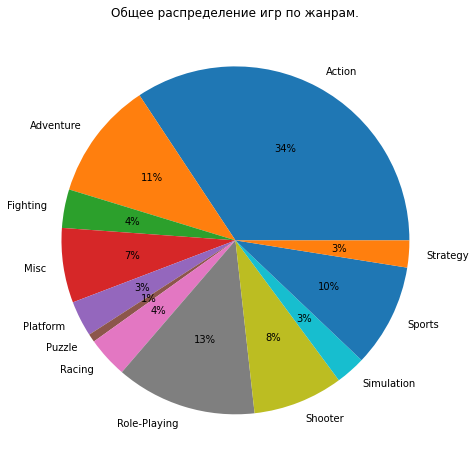

In [48]:
genre.plot(kind='pie',y="count", autopct='%1.0f%%', legend=False, title = "Общее распределение игр по жанрам.", figsize=(8, 8)).set(ylabel='')

Распределение продаж в зависимости от жанра игры:

<AxesSubplot:xlabel='genre'>

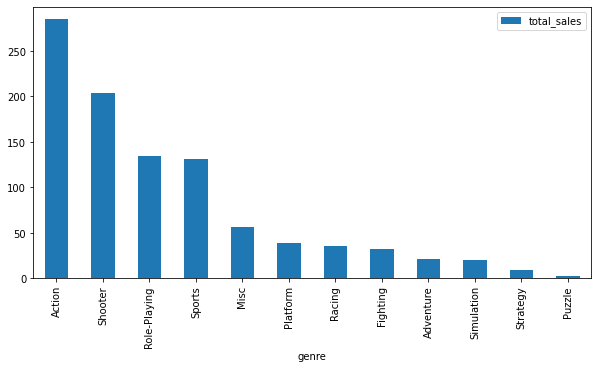

In [49]:
(relevantgames
                   .pivot_table(index='genre', aggfunc={'total_sales':sum})
                   .sort_values(by='total_sales', ascending=False)
                   .plot(y='total_sales', kind='bar', figsize=(10, 5))
)

<AxesSubplot:xlabel='genre'>

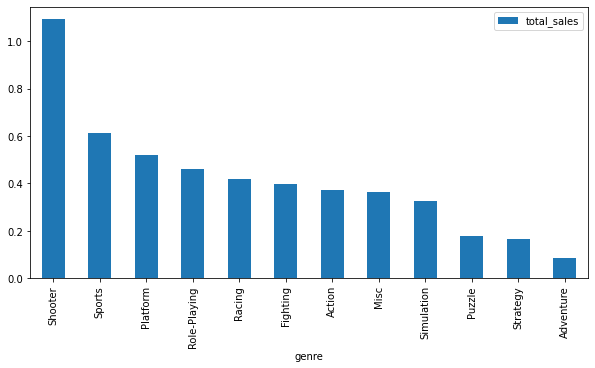

In [50]:
(relevantgames
                   .pivot_table(index='genre', aggfunc={'total_sales':mean})
                   .sort_values(by='total_sales', ascending=False)
                   .plot(y='total_sales', kind='bar', figsize=(10, 5))
)

Жанр "Action" явный лидер, он вызывает наибольший интерес у пользователей,но и самая большая конкуренция среди издателей.  После него почти с двухратным отставанием идет "Shooter", "Role-Playing" и "Sports". Менее популярные жанры среди пользователей - "Puzzle", "Strategy" и "Simulation"

Стоит отметить, что по средним продажам лидером является Shooter, на 2-м месте с большим отставанием идет Sport, Action находится только в середине, замыкает список жанр Adventure. В жанре Shooter средняя цена игры высока, но их не очень много, для жанра  Action ситуация другая - игр очень много, средняя цена по ним невелика.

## Шаг 4. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
    
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5)

<AxesSubplot:title={'center':'Популярность платформ в Японии'}, ylabel='sales'>

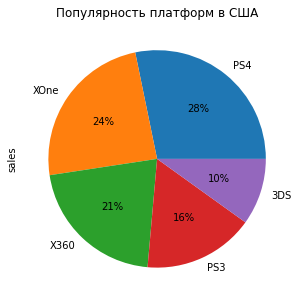

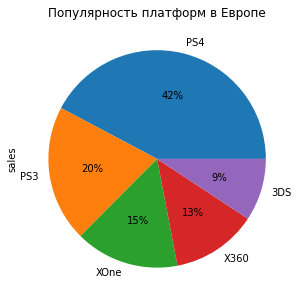

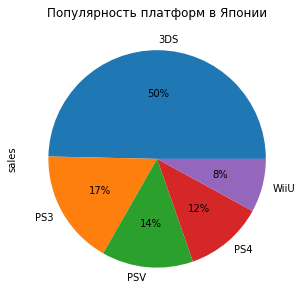

In [51]:
na_sales = relevantgames.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_sales.columns = ['sales']
na_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в США", figsize=(5, 5))

eu_sales = relevantgames.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.columns = ['sales']
eu_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в Европе", figsize=(5, 5))

jp_sales = relevantgames.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_sales.columns = ['sales']
jp_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в Японии", figsize=(5, 5))

Можно отметить, что в каждом регионе есть свои лидеры по популярности продаж игр среди платформ. Возможно это связанно с нацеленностью на внутренний рынок  у Xbox в США, PS3 в Японии. 

В целом платформа PS4 наиболее популярная в мире. В Европе и США платформы распределены похоже.

В Европе сильны позиции ПК гейминга, а в США пользуются спросом WiiU . В Японии популярны карманные приставки.

#### Самые популярные жанры (топ-5)

[Text(0, 0.5, '')]

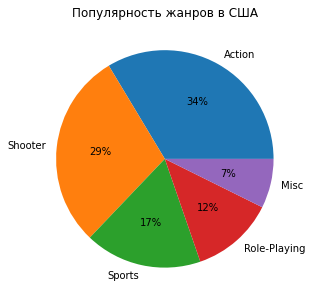

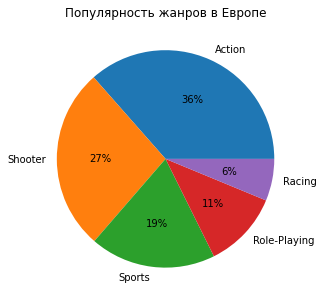

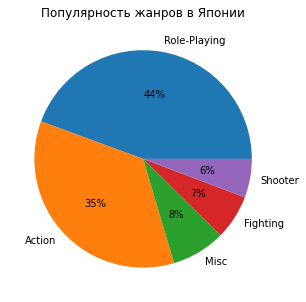

In [52]:
na_genres = relevantgames.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_genres.columns = ['sales']
na_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность жанров в США", figsize=(5, 5)).set(ylabel='')

eu_genres = relevantgames.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_genres.columns = ['sales']
eu_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность жанров в Европе", figsize=(5, 5)).set(ylabel='')

jp_genres = relevantgames.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_genres.columns = ['sales']
jp_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность жанров в Японии", figsize=(5, 5)).set(ylabel='')

Явным лидером во всем мире является жанр "Action". 

В целом распределение жанров по США и Европе мало различается. 

В Японии "Shooter" пользуются меньше популярность чем "Role-Playing" 

In [53]:
#### Влияние рейтинга ESRB на продажи в отдельном регионе

[Text(0, 0.5, '')]

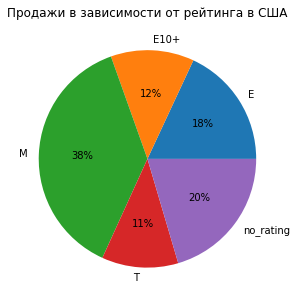

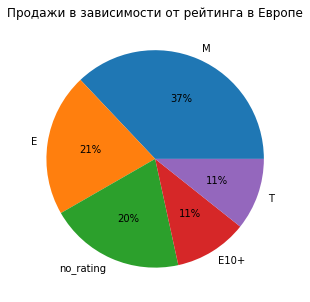

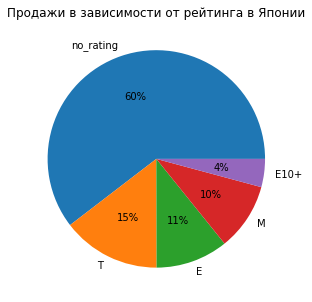

In [54]:
na_rating = relevantgames.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating.columns = ['sales']
na_rating.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажи в зависимости от рейтинга в США", figsize=(5, 5)).set(ylabel='')

eu_ratings = relevantgames.pivot_table(index='rating', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_ratings.columns = ['sales']
eu_ratings.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажи в зависимости от рейтинга в Европе", figsize=(5, 5)).set(ylabel='')

jp_rating = relevantgames.pivot_table(index='rating', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_rating.columns = ['sales']
jp_rating.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажи в зависимости от рейтинга в Японии", figsize=(5, 5)).set(ylabel='')

Самые зрелищные и реалистичные игры: экшены и шутеры получают взрослые рейтинги что может объяснить высокие продажи игры взрослых рейтингов в США и Европе.

Дети любят компьютерные игры, для них изготавливается свой контент. Этим можно объяснить суммарно большой процент детских игр. Игры для тинейджеров менее популярны, так как ограничены по многим параметрам. А подростки могут спокойно покупать игры со взрослыми ограничениями.

Из даных векипедии : в онлайн-играх, содержимое которых может модифицироваться пользователями (например, диалоги, карты, модели персонажей), используется замечание «Game Experience May Change During Online Play», которое предупреждает покупателей о том, что пользовательский контент в игре не проходил рецензирования ESRB. Этим можно объяснить наличие игр без рейтинга, хоть и в малых количествах.

Большое распространение рейтинга Т на Японском рынке можно связать с большим распространением  Аниме, но точного ответа на данный вопрос дать не могу.

## Шаг 5. Проверка гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H₀ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Задаем α=5%, так как  из-за большого пропуска данных, есть риск ошибочно отвергнуть гипотизу.

In [55]:
xone = relevantgames.query('platform == "XOne"')['user_score']
pc = relevantgames.query('platform == "PC"')['user_score']

In [56]:
print(np.var(xone,ddof=1))
print(np.var(pc,ddof=1))

11.493829606923908
9.609698265621287


In [57]:
print(xone.mean())
print(pc.mean())

4.80042372881356
5.123913043478261


Дисперсии выборок не равны, поэтому  equal_var==False

In [58]:
alpha = 0.05
results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что нулевая гипотиза не может быть отвергнута, поэтому вероятно, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

#### Средние пользовательские рейтинги жанров Action и Sports  разные

Нулевая гипотеза H₀ - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁ - средние пользовательские рейтинги жанров Action  и Sports  различаются.

α=5% задем из-за большого количества пропусков данных, и повышенного риска ошибочно отвергнуть гипотизу.

In [59]:
action = relevantgames.query('genre == "Action"')['user_score']
sports = relevantgames.query('genre == "Sports"')['user_score']

In [60]:
print(action.mean())
print(sports.mean())

3.2168741355463344
3.9656716417910443


In [61]:
print(np.var(action,ddof=1))
print(np.var(sports,ddof=1))

16.23985337333287
8.87876567164179


Дисперсии выборок не равны, поэтому  equal_var==False

In [62]:
alpha = 0.05
results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что нулевая гипотеза может быть отвергнута,  поэтому вероятно, что средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

1. При создании кампании на 2017-й год необходимо ориентироваться на игровые платформы PS4 и XBox One.
Игра должна быть в жанре Action или Shooter. Данные пункты дадут захват наибольшей аудитории и возможность  максимальных прибылей(не гарантированной).
Если целью является японский рынок, то  надо ориентироваться на карманные консоли и делать ставку на Role-Playing(RPG).

2. Продавать игры лучше всего с максимальной реалистичностью, рейтинга M (игры без рейтинга тоже могут частично сюда относиться). Стоит обратить внимание на потребление детских игр. Не стоит сильно рассчитывать на подростковые игры.

3. Оценки пользователей появляются после такого как они уже приобретают игры, поэтому на продажи они влияют опосредованно, в небольшой степени. Чуть больше влияние оказывают влияние оценки критиков. Как правило,  игры они получают до релиза, плюс у них есть влияние на аудиторию. Видно, что оценки критиков бывают не совпадают с оценками игроков (влияние маркетингового бюджета).